## Análise dos Microdados do ENEM

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
microdadosEnem = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=";", encoding="ISO-8859-1")

In [3]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [4]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [5]:
colunas_selecionadas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA']

In [6]:
microdadosEnem_selecionadas = microdadosEnem.filter(items=colunas_selecionadas)

In [7]:
microdadosEnem_selecionadas.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA
0,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima
1,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió
2,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos
3,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato
4,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape


In [8]:
coluna_municipio_residencia = microdadosEnem_selecionadas['NO_MUNICIPIO_ESC']

In [9]:
coluna_municipio_residencia.value_counts().head(10)
# Esses são os 10 estados onde residem a maioria dos inscritos do Enem 2021.

São Paulo         37692
Fortaleza         27767
Rio de Janeiro    24163
Manaus            17488
Brasília          16913
Salvador          11382
Belo Horizonte    10638
Curitiba           9717
Goiânia            9577
Recife             9411
Name: NO_MUNICIPIO_ESC, dtype: int64

<AxesSubplot:>

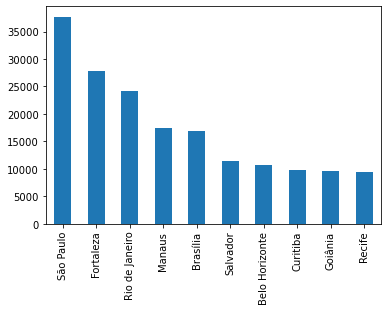

In [10]:
coluna_municipio_residencia.value_counts().head(10).plot(kind = 'bar')

In [11]:
coluna_faixa_etaria = microdadosEnem_selecionadas['TP_FAIXA_ETARIA']

In [12]:
dic_faixa_etaria = {1: 'Menor de 17 anos', 2 : '17 anos', 3: '18 anos', 4: '19 anos', 5: '20 anos', 
                    6: '21 anos', 7: '22 anos', 8: '23 anos', 9: '24 anos', 10: '25 anos', 11: 'Entre 26 e 30 anos', 
                    12: 'Entre 31 e 35 anos', 13: 'Entre 36 e 40 anos', 14: 'Entre 41 e 45 anos', 
                    15: 'Entre 46 e 50 anos', 16: 'Entre 51 e 55 anos', 17: 'Entre 56 e 60 anos', 
                    18: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 20: 'Maior de 70 anos'}

In [13]:
microdadosEnem_selecionadas['FAIXA_ETARIA'] = [dic_faixa_etaria[opc] for opc in microdadosEnem_selecionadas['TP_FAIXA_ETARIA'].sort_values()]

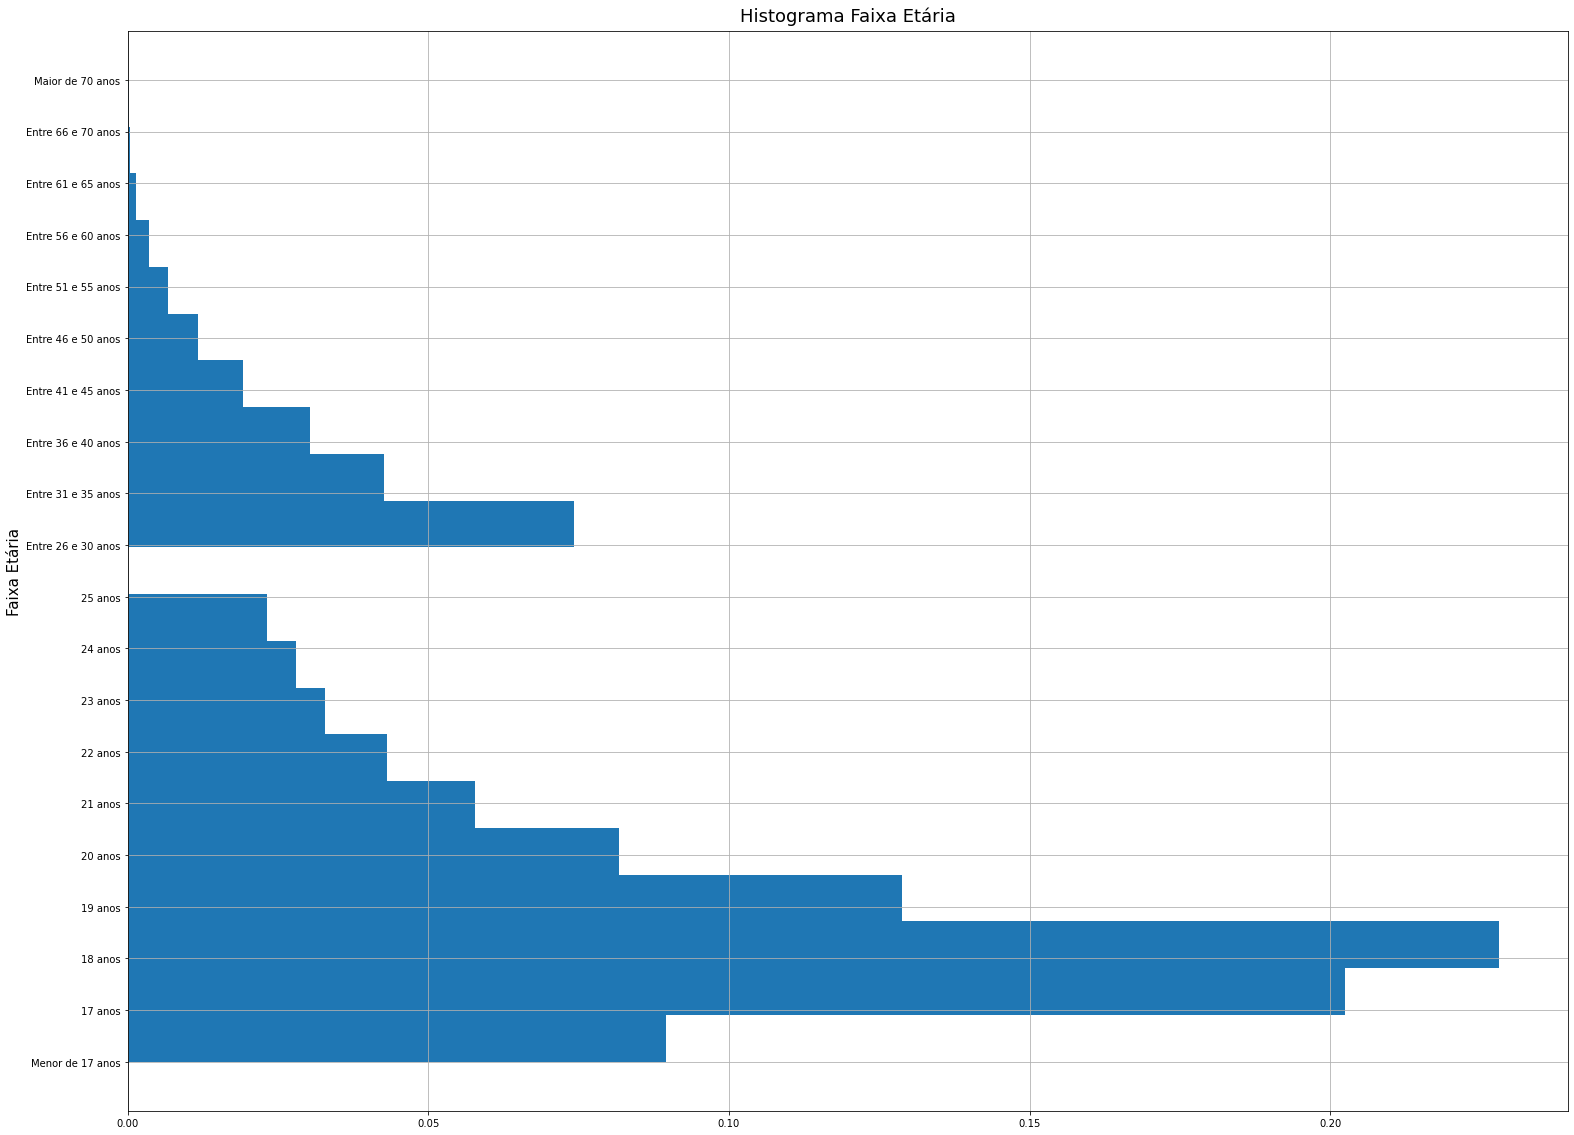

In [14]:
fig = plt.figure(figsize = (20, 15))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.hist(microdadosEnem_selecionadas['FAIXA_ETARIA'], bins = 21, orientation = 'horizontal', density = True)
eixo.set_title('Histograma Faixa Etária', fontsize = 18, pad = 10)
eixo.set_ylabel('Faixa Etária', fontsize = 15)
eixo.grid(True)

# Podemos verificar que a maioria dos inscritos possuem entre 18 e 19 anos.

In [15]:
coluna_uf_da_escola = microdadosEnem_selecionadas['SG_UF_ESC']

In [16]:
uf_das_escolas = coluna_uf_da_escola.value_counts()
uf_das_escolas

SP    139473
CE     93159
MG     64236
RJ     54639
BA     48040
GO     44963
PR     42365
PE     40227
RS     35803
AM     33394
PA     26929
SC     26394
MA     21140
ES     17657
PB     17647
DF     16913
PI     13531
RN     12939
MT     12703
AL     10686
MS     10672
SE      8480
RO      7699
TO      6460
AC      3008
AP      2863
RR      1786
Name: SG_UF_ESC, dtype: int64

Text(0, 0.5, 'Quantidade dos inscritos por UF')

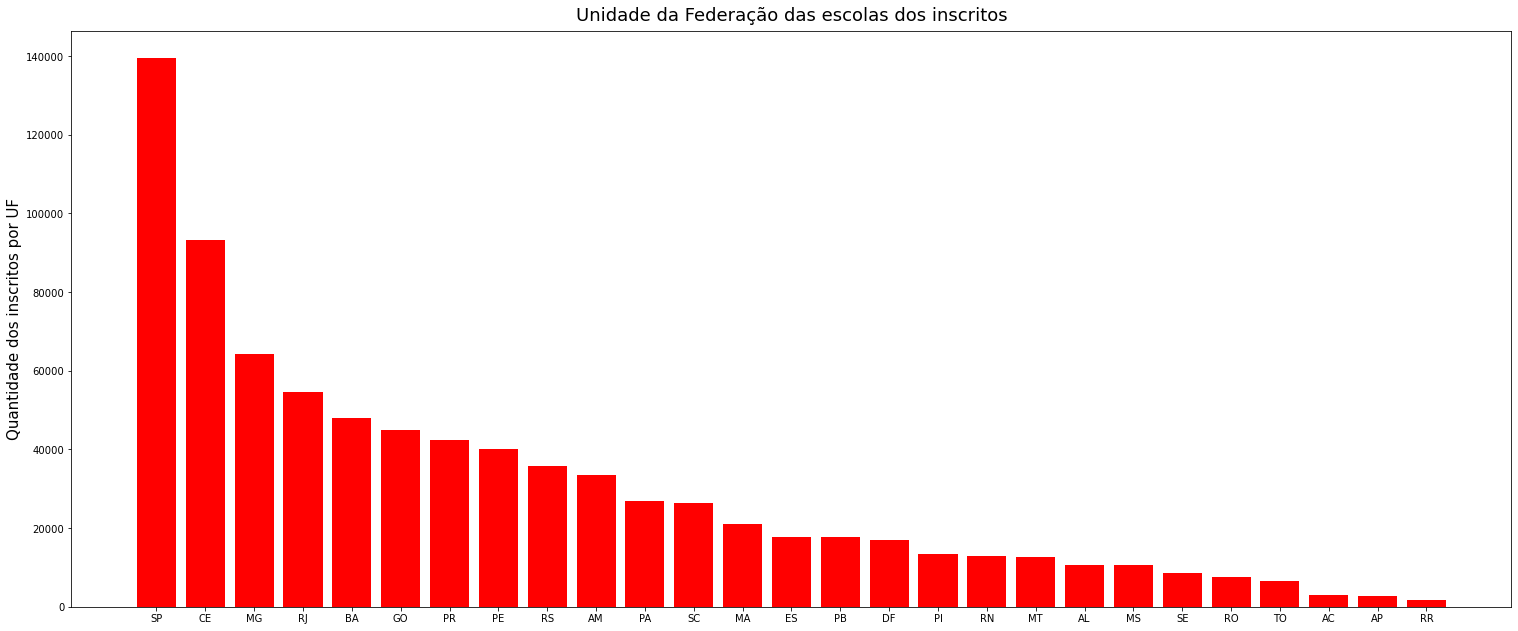

In [17]:
fig = plt.figure(figsize = (20, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.bar(uf_das_escolas.index, uf_das_escolas.values, color = 'red')
eixo.set_title('Unidade da Federação das escolas dos inscritos', fontsize = 18, pad = 10)
eixo.set_ylabel('Quantidade dos inscritos por UF', fontsize = 15)

# Aqui podemos ver que a maioria dos inscritos são de escolas do Estado de SP.

In [18]:
coluna_sexo = microdadosEnem_selecionadas['TP_SEXO']

In [19]:
distSexo = coluna_sexo.value_counts()

In [20]:
distSexo

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [21]:
percentSexo = [100* x/distSexo.sum() for x in distSexo]

In [22]:
percentSexo
print(f'Porcetagem de inscritos do sexo feminino {percentSexo[0].round(2)}%')
print(f'Porcentagem de inscritos do sexo masculino {percentSexo[1].round(2)}%')

# Aqui vemos que a grande maioria dos alunos inscritos para o Enem de 2021 são do sexo Feminino

Porcetagem de inscritos do sexo feminino 61.67%
Porcentagem de inscritos do sexo masculino 38.33%


In [23]:
colunas_notas = ['TP_SEXO', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT' ]

In [24]:
notas_enem = microdadosEnem.filter(items=colunas_notas)

In [25]:
notas_enem.head()

,TP_SEXO,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,F,760.0,NaN,574.6,472.6,NaN
1,M,560.0,505.9,551.8,498.3,461.5
2,F,NaN,NaN,NaN,NaN,NaN
3,M,780.0,580.7,678.9,638.9,659.5
4,F,780.0,497.7,532.4,457.6,582.6


In [26]:
notas_enem  = notas_enem.dropna()

In [27]:
notas_enem.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_SEXO,,,,,
F,1000.0,867.1,846.9,826.1,953.1
M,1000.0,867.1,846.9,813.2,953.1


In [28]:
notas_enem.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_SEXO,,,,,
F,0.0,0.0,0.0,0.0,0.0
M,0.0,0.0,0.0,0.0,0.0


In [29]:
notas_enem.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_SEXO,,,,,
F,633.407224,483.205442,516.310264,501.675265,519.903830
M,605.015102,505.936664,534.273942,510.040547,559.882396


<AxesSubplot:xlabel='TP_SEXO'>

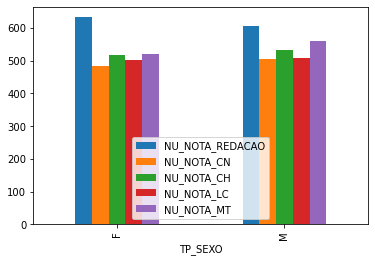

In [30]:
notas_enem.groupby('TP_SEXO').mean().plot(kind = 'bar')

# Podemos notar uma média maior nas notas de redação dos inscritos do sexo feminino 
# e uma média maior nas notas das outras provas para os inscritos do sexo masculino. Porém nada significativo.

### Vamos olhar as provas com médias mais relevantes em relação ao sexo do candidato, que foram as notas de redação e matemática, e vamos ver sua relação com o nível de escolaridade de seus pais.

In [31]:
colunasSelec = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [32]:
microdadosEnemSelec = microdadosEnem.filter(items=colunasSelec)

In [33]:
microdadosEnemSelec.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,210053865474,NaN,760.0,F,F
1,210052384164,461.5,560.0,B,B
2,210052589243,NaN,NaN,B,C
3,210052128335,659.5,780.0,B,B
4,210051353021,582.6,780.0,D,E


In [34]:
microdadosEnemSelec = microdadosEnemSelec.dropna()

In [35]:
microdadosEnemSelec.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,210052384164,461.5,560.0,B,B
3,210052128335,659.5,780.0,B,B
4,210051353021,582.6,780.0,D,E
8,210053417016,493.4,520.0,B,B
9,210051128744,413.3,380.0,D,D


In [36]:
diconario001e002 = {'A': 'Nunca estudou', 'B':'Não completou a 4ª série/5º ano do Ensino Fundamental', 
                    'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 
                    'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio', 
                    'E': 'Completou o Ensino Médio, mas não completou a Faculdade', 
                    'F': 'Completou a Faculdade, mas não completou a Pós-graduação', 
                    'G': 'Completou a Pós-graduação','H': 'Não sei'}

### Criando uma coluna e conectando os dados do diconario001e002 com a tabela Q001 e Q002.

In [37]:
microdadosEnemSelec['NO_Q001'] = [diconario001e002[opc] for opc in microdadosEnemSelec.Q001]

In [38]:
microdadosEnemSelec.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...


In [39]:
microdadosEnemSelec['NO_Q002'] = [diconario001e002[opc] for opc in microdadosEnemSelec.Q002 ]

In [40]:
microdadosEnemSelec.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...


In [41]:
microdadosEnemSelec.NO_Q001[1]

'Não completou a 4ª série/5º ano do Ensino Fundamental'

### Comparando nivel de escolaridade do pai

In [42]:
microdadosEnemSelec.filter(items =['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', 
                                                                                                      ascending = False)
# Podemos verificar aqui que a maioria dos inscritos possui pais com ensino médio completo. 


,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",681530
Não completou a 4ª série/5º ano do Ensino Fundamental,349980
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",281447
"Completou a Faculdade, mas não completou a Pós-graduação",246549
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245630
Completou a Pós-graduação,183606
Não sei,172965
Nunca estudou,76399


## Comparando nivel de escolaridade da mãe

In [43]:
microdadosEnemSelec.filter(items =['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', 
                                                                                                      ascending = False)

# Podemos verificar aqui que a maioria dos inscritos possui mães com ensino médio completo. 

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",795005
"Completou a Faculdade, mas não completou a Pós-graduação",321187
Completou a Pós-graduação,309702
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",245533
Não completou a 4ª série/5º ano do Ensino Fundamental,243449
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",226251
Não sei,48908
Nunca estudou,48071


## Notas de matemática comparando a escolaridade do pai.

In [44]:
q001mat = microdadosEnemSelec.filter(items =['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending = False)

In [45]:
q001mat

# Podemos ver que as melhores notas estão relacionadas, de forma diretamente proporcinal, ao nível de escolaridade do pai.

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,613.461090
"Completou a Faculdade, mas não completou a Pós-graduação",597.511863
"Completou o Ensino Médio, mas não completou a Faculdade",543.113614
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",521.973493
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",511.070163
Não sei,504.740075
Não completou a 4ª série/5º ano do Ensino Fundamental,492.429393
Nunca estudou,471.658243


In [46]:
import seaborn as sns

<AxesSubplot:title={'center':'Escolaridade do pai X Nota de Matemática'}, xlabel='Notas de Matemática', ylabel='Nível de escolaridade dos pais'>

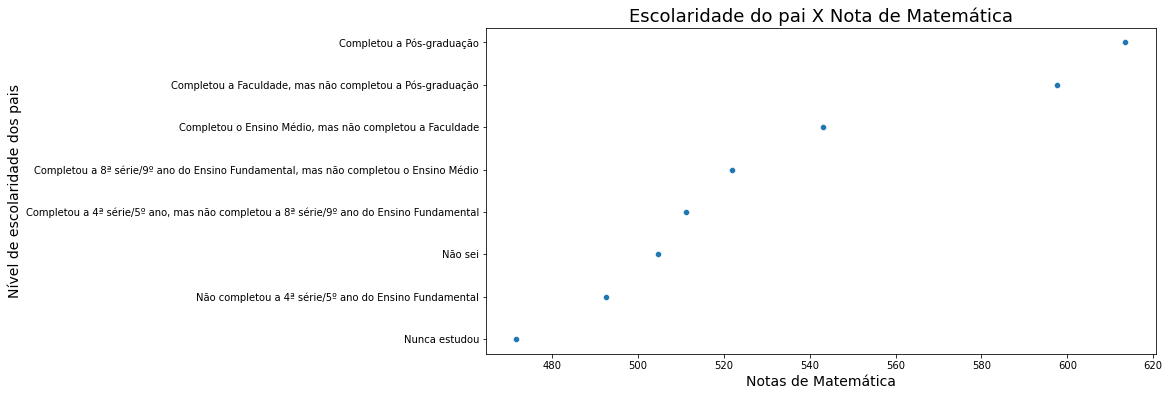

In [47]:
ax = sns.scatterplot(x = 'NU_NOTA_MT', y = 'NO_Q001', data = q001mat )
ax.figure.set_size_inches(12, 6)
ax.set_title('Escolaridade do pai X Nota de Matemática', fontsize=18)
ax.set_xlabel('Notas de Matemática', fontsize=14)
ax.set_ylabel('Nível de escolaridade dos pais', fontsize=14)
ax

## Notas de matemática comparando a escolaridade da mãe.

In [48]:
q002mat = microdadosEnemSelec.filter(items =['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending = False)

In [49]:
q002mat

# Podemos ver que as melhores notas estão relacionadas, de forma linear, ao nível de escolaridade da mãe. 

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,592.406291
"Completou a Faculdade, mas não completou a Pós-graduação",582.600755
"Completou o Ensino Médio, mas não completou a Faculdade",533.379838
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",510.363869
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",501.083591
Não sei,493.232768
Não completou a 4ª série/5º ano do Ensino Fundamental,484.995819
Nunca estudou,464.279863


In [50]:
 microdadosEnemSelec.filter(items =['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q001                                                                     
Completou a 4ª série/5º ano, mas não completou ...   281447.0  511.070163   
Completou a 8ª série/9º ano do Ensino Fundament...   245630.0  521.973493   
Completou a Faculdade, mas não completou a Pós-...   246549.0  597.511863   
Completou a Pós-graduação                            183606.0  613.461090   
Completou o Ensino Médio, mas não completou a F...   681530.0  543.113614   
Nunca estudou                                         76399.0  471.658243   
Não completou a 4ª série/5º ano do Ensino Funda...   349980.0  492.429393   
Não sei                                              172965.0  504.740075   

                                                                            \
                                                           std  min    25%   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...   97.281056  0.0  434.3   
Completou a 8ª série/9º ano do Ensino Fundament...  100.632967  0.0  441.2   
Completou a Faculdade, mas não completou a Pós-...  117.307726  0.0  502.7   
Completou a Pós-graduação                           119.512693  0.0  519.5   
Completou o Ensino Médio, mas não completou a F...  107.484050  0.0  454.7   
Nunca estudou                                        80.443339  0.0  412.9   
Não completou a 4ª série/5º ano do Ensino Funda...   89.595417  0.0  424.0   
Não sei                                              95.641760  0.0  430.1   

                                                                         
                                                      50%    75%    max  
NO_Q001                                                                  
Completou a 4ª série/5º ano, mas não completou ...  491.4  574.7  953.1  
Completou a 8ª série/9º ano do Ensino Fundament...  504.0  591.1  953.1  
Completou a Faculdade, mas não completou a Pós-...  601.8  684.0  953.1  
Completou a Pós-graduação                           622.3  700.7  953.1  
Completou o Ensino Médio, mas não completou a F...  529.4  621.5  953.1  
Nunca estudou                                       453.3  513.0  953.1  
Não completou a 4ª série/5º ano do Ensino Funda...  472.6  545.4  930.6  
Não sei                                             483.9  565.5  953.1

# Verificando a distribuição do desempenho dos alunos dentro de cada grupo relacionado a escolaridade do pai

In [51]:
selecao_colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'NO_Q001', 'NO_Q002']

In [52]:
novomicrodados = microdadosEnem.filter(items = selecao_colunas)

In [53]:
q001notas = novomicrodados.filter(items =['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001']).groupby('Q001').mean()

In [54]:
diconario001e002

{'A': 'Nunca estudou',
 'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
 'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
 'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
 'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
 'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
 'G': 'Completou a Pós-graduação',
 'H': 'Não sei'}

In [55]:
q001notas

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q001,,,,,
A,455.024765,478.329591,454.101435,471.535114,524.369953
B,466.465178,492.610014,472.999984,492.323517,561.042584
C,475.450386,503.717690,487.243701,510.957795,586.215277
D,481.170135,509.783978,495.174775,521.893082,600.304595
E,495.625145,525.792850,510.303620,543.023586,628.461002
F,533.191863,563.330120,543.072960,597.410963,688.584418
G,543.614148,571.346873,550.095377,613.320230,708.026036
H,471.833737,499.181521,484.522649,504.585696,563.835124


<AxesSubplot:xlabel='Q001'>

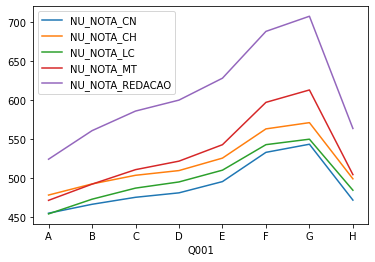

In [56]:
q001notas.plot()

## Podemos verificar que todas as avaliações tem nota máxima média no grupo G que é o grupo de alunos com pais que terminaram a pós-graduação.

---

### VAMOS VERIFICAR SE ESSA TENDÊNCIA VISTA ACIMA PERMANECE SEPARANDO OS DADOS POR ESTADOS.

In [57]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [58]:
microdadosEnem.SG_UF_ESC.unique()

array([nan, 'CE', 'BA', 'ES', 'SP', 'PE', 'PA', 'RS', 'RJ', 'GO', 'DF',
       'MG', 'RN', 'MA', 'PI', 'AM', 'PR', 'AL', 'MT', 'SC', 'PB', 'RO',
       'SE', 'MS', 'TO', 'RR', 'AP', 'AC'], dtype=object)

In [59]:
microdadosEnemSelec['SG_UF_ESC'] = microdadosEnem.SG_UF_ESC

In [60]:
microdadosEnemSelec.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_ESC
1,210052384164,461.5,560.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,NaN
3,210052128335,659.5,780.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,CE
4,210051353021,582.6,780.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",CE
8,210053417016,493.4,520.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,NaN
9,210051128744,413.3,380.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,NaN


In [61]:
microdadosEnemSelec.filter(items = ['NU_NOTA_REDACAO', 'NO_Q002']).where(microdadosEnemSelec.SG_UF_ESC == 'RJ')\
.groupby('NO_Q002').mean().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)

# Olhando pelo RJ vemos que a tendência se repete em relação a escolaridade dos pais.

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,742.573022
"Completou a Faculdade, mas não completou a Pós-graduação",718.871640
"Completou o Ensino Médio, mas não completou a Faculdade",640.465859
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",608.921569
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",600.164580
Não sei,589.654350
Não completou a 4ª série/5º ano do Ensino Fundamental,577.700880
Nunca estudou,533.714286


In [62]:
# Vamos verificar o mesmo para todos os Estados
notas_por_estado = microdadosEnemSelec.filter(items = ['SG_UF_ESC','NU_NOTA_REDACAO', 'NO_Q002'])\
.groupby(['SG_UF_ESC', 'NO_Q002']).mean().sort_values(by = 'NU_NOTA_REDACAO', ascending = False)

In [63]:
notas_por_estado

,,NU_NOTA_REDACAO
SG_UF_ESC,NO_Q002,
SE,Completou a Pós-graduação,762.810811
PI,Completou a Pós-graduação,751.054904
RN,Completou a Pós-graduação,746.384568
PB,Completou a Pós-graduação,745.218914
RJ,Completou a Pós-graduação,742.573022
...,...,...
AM,Não sei,441.232666
RO,Nunca estudou,437.543860
CE,Nunca estudou,437.477897


<AxesSubplot:title={'center':'Nível de escolaridade dos pais X Notas de redação dos incritos por Estado'}, xlabel='UF de residência dos inscritos', ylabel='Notas de redação'>

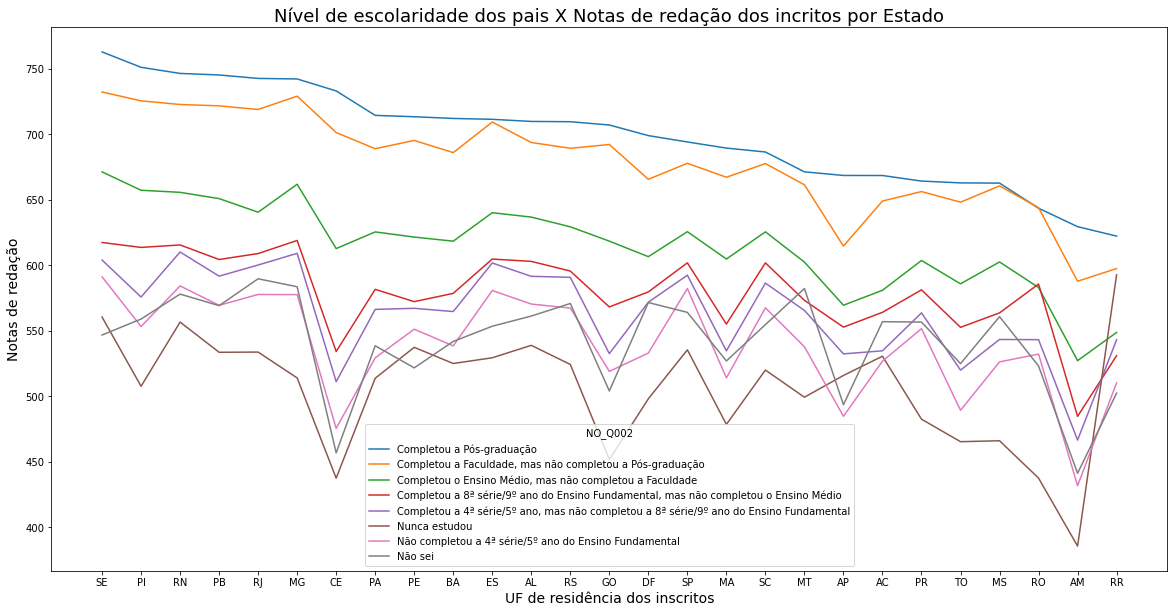

In [64]:
ax = sns.lineplot(x = 'SG_UF_ESC', y = 'NU_NOTA_REDACAO', hue = 'NO_Q002', data = notas_por_estado)
ax.figure.set_size_inches(20, 10)
ax.set_title('Nível de escolaridade dos pais X Notas de redação dos incritos por Estado', fontsize=18)
ax.set_ylabel('Notas de redação', fontsize=14)
ax.set_xlabel('UF de residência dos inscritos', fontsize=14)
ax

# Podemos observar que a tendência de notas mais elevadas por nível de escolaridade dos pais
# permanece para todos os Estados.